# Module 7: Support Vector Machines

# Introduction

In machine learning, __support vector machines (SVMs)__ are a type of supervised learning model we can use for classification and regression analysis. SVMs are a very specific class of algorithms, characterized by:

* Use of kernels
* Absence of local minima
* Sparseness of the solution 
* Capacity control obtained by acting on the margin

SVMs are powerful and capable of performing linear and non-linear classification and regression. The core idea behind SVMs is fairly simple and is a good addition to a data scientist's toolbox.

The basic training principle of SVMs is motivated by statistical learning theory with the goal of minimizing expected classification error for unseen test samples. This is how SVMs define good predictive models.

# Learning Outcomes

In this module, you will:

* Become familiar with how support vector machines (SVM) handle classification and regression
* Apply linear and non-linear SVMs to classification problems
* Describe how to leverage SVMs for regression problems
* Apply SVMs by using scikit-learn


# Readings and Resources

- Géron, A. (2019). Chapter 5: Support Vector Machines in *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/


<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-7:-Support-Vector-Machines" data-toc-modified-id="Module-7:-Support-Vector-Machines">Module 7: Support Vector Machines</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Binary-Classification-with-Support-Vector-Machines" data-toc-modified-id="Binary-Classification-with-Support-Vector-Machines">Binary Classification with Support Vector Machines</a></span>
<ul class="toc-item">
<li><span><a href="#Hard-Margin" data-toc-modified-id="Hard-Margin">Hard Margin</a></span>
<ul class="toc-item">
<li><span><a href="#Dual-Optimization" data-toc-modified-id="Dual-Optimization">Dual Optimization</a></span>
</li>
</ul>
</li>
<li><span><a href="#Soft-Margin" data-toc-modified-id="Soft-Margin">Soft Margin</a></span>
<ul class="toc-item">
<li><span><a href="#Binary-Classification-using-scikit-learn" data-toc-modified-id="Binary-Classification-using-scikit-learn">Binary Classification using scikit-learn</a></span>
</li>
</ul>
</li>
</ul>
</li>
<li><span><a href="#Nonlinear-SVM-Classification" data-toc-modified-id="Nonlinear-SVM-Classification">Nonlinear SVM Classification</a></span>
<ul class="toc-item">
<li><span><a href="#Polynomial-Kernel" data-toc-modified-id="Polynomial-Kernel">Polynomial Kernel</a></span>
<ul class="toc-item">
<li><span><a href="#Polynomial-Kernel-using-scikit-learn" data-toc-modified-id="Polynomial-Kernel-using-scikit-learn">Polynomial Kernel using scikit-learn</a></span>
</li>
</ul>
</li>
<li><span><a href="#Gaussian-Kernel" data-toc-modified-id="Gaussian-Kernel">Gaussian Kernel</a></span>
<ul class="toc-item">
<li><span><a href="#Gaussian-Kernel-using-scikit-learn" data-toc-modified-id="Gaussian-Kernel-using-scikit-learn">Gaussian Kernel using scikit-learn</a></span>
</li>
</ul>
</li>
</ul>
</li>
<li><span><a href="#SVM-Regression" data-toc-modified-id="SVM-Regression">SVM Regression</a></span>
<ul class="toc-item">
<li><span><a href="#Linear-SVM-Regression-using-scikit-learn" data-toc-modified-id="Linear-SVM-Regression-using-scikit-learn">Linear SVM Regression using scikit-learn</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Binary Classification with Support Vector Machines 

You can use a support vector machine (SVM) when your data has exactly two classes. In binary classification, an SVM classifies data by finding the best hyperplane that separates two classes from each other.

## Hard Margin

If the training data for our classification problem is perfectly linearly separable (that is we can separate the data cleanly by class using only straight lines), we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the __margin__. If we strictly impose that all data points be separated by our line (sometimes called the margin lines), it is called __hard margin__ classification. 

As seen in the figure below, given a set of training examples (blue and red dots), we'd like to mark each point as belonging to one or the other of the two categories.

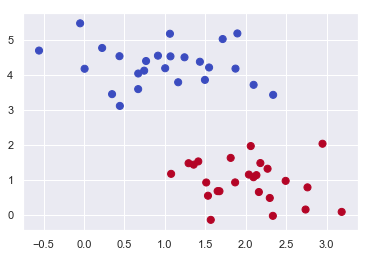
<center><b>Figure 1. Perfectly Linearly Separable Data Points</b></center>

The easiest way to separate the blue dots from red dots is to draw a line between them. 


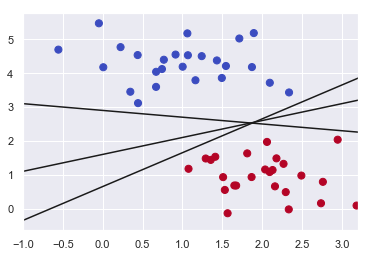
<center><b>Figure 2. Sample Lines for Separating Data Points</b></center>

As seen in the figure above, we have many options for drawing a line. So, a better question is "Which line should we pick to best separate these dots?" We can call SVM the __widest street approach__ since it finds the hyperplane that leaves the largest possible margin on both sides of the blue and red dots, until the first example from either class is encountered (Figure 3). One interesting fact about SVM is it is highly dependent on the closest data points and not that much affected by others and therefore outliers.


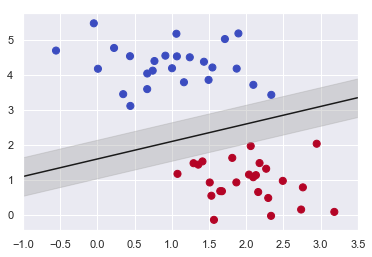
<center><b>Figure 3. Margin lines and Hyperplane for Perfectly Separable Data Points</b></center>


Since we know the characteristics that we want for the separator line, we can formulate our assumptions into a mathematical problem. We want to find the best separator hyperplane. Like many machine learning algorithms, we reduce finding the best hyperplane to optimizing a cost function so we can solve it using well-understood optimization techniques (such as gradient descent). So, we will look to see how we can build this cost function. 

In the figure above, we have three lines based on our widest street analogy; one median line and two gutter lines. We identify our median line as $w^T \cdot x + b = 0$ ($w^T$ is the coefficient and $b$ is the bias or intercept for the hyperplane) and the margin lines (gutters) correspond to $w^T \cdot x + b=1$ and $w^T \cdot x + b=-1$.  We can assume the following equation is true since any point above the median line is blue and any point below the line is red:


$$
\text{Estimated Label:}
\begin{cases} 
      \text{red} & \text{if } w^T \cdot x + b<0 \\
      \text{blue} & \text{if } w^T \cdot x + b\geq 0 
  \end{cases}
$$


Since $w^T \cdot x + b = +1$ and $w^T \cdot x + b=-1$ are margin lines, SVM finds an $n$-dimensional vector $w$ and a constant $b$ such that all examples $x^{(i)}$ with color $blue$ have $w^T \cdot x^{(i)} + b \geq 1$ and those with color $red$ have $w^T \cdot x^{(i)} + b \leq -1$.

For the blue point which touches the upper margin line, we have $w^T \cdot x^{blue} + b =+1 $ and, for the red point which touches the lower margin line we have $w^T \cdot x^{red} + b =-1 $

That means $x^{blue}$ lies on the upper margin line, and $x^{red}$ on the lower margin line (all margin lines are parallel). We want to calculate $x^{blue} - x^{red}$ in the direction of $w$ and by construction, $w$ is perpendicular to these three lines. By geometry, it follows that the distance between the two dashed lines (margins) is equal to:


$$\frac{w}{||w||}\cdot (x^{blue} - x^{red}) = \frac{w^T \cdot (x^{blue} - x^{red})}{||w||} = \frac{w^T \cdot x^{blue} - w^T \cdot x^{red}}{||w||} = \frac{1-b - (-1-b)}{||w||} = \frac{2}{||w||}$$


Since we know how to calculate the margin, and we like to make it as large as possible, this is the same as minimizing $||w||$, which is the same as minimizing $\frac{1}{2} ||w||^2 = \frac{1}{2} w^T \cdot w$. We do this change since mathematically it is more convenient to calculate $\frac{1}{2} w^T \cdot w$. 

On the other hand, since this is *hard margin*, all blue points should satisfy $w^T \cdot x+b\geq 1$ and all red points should satisfy $w^T \cdot x+b\leq -1$, if we can assume blue points as positive examples and red points as negative examples. This can be concisely written as: $y(w^T \cdot x+b)\geq 1$, so the problem of finding $w,b$ can be expressed as 


$$ \text{Hard-margin:} \begin{cases} 
      \text{minimize} & \frac{1}{2}w^T \cdot w \\
      \text{subject to} & y^{(i)}(w^T \cdot x^{(i)}+b)\geq 1 \text{ for every training example } 
   \end{cases}
$$


This objective function guarantees we have a maximum margin while avoiding margin violations. So we have a particular case of a well known optimization problem called [__quadratic programming__](https://en.wikipedia.org/wiki/Quadratic_programming) (QP). In its most general formulation, quadratic programming looks like:


$$ \text{Hard-margin:} \begin{cases} 
      \text{minimize} & \frac{1}{2}u^T \cdot H \cdot u + f^T \cdot u \\
      \text{subject to} & A \cdot u\leq d 
   \end{cases}
$$


where $u$ is a $q$-dimensional vector being optimized, $H$ is a symmetric $q \times q$ matrix, $f$ is an $q$-dimensional vector,  $d$ is an $m$ dimensional vector, and $A$ is a $m \times q$ matrix.

Doing the appropriate substitutions, the hard margin formulation can be seen as a QP problem:


- $q=n+1$, the number of features + 1, to include the bias term $b$

- $u = (b,w_1,...,w_n)$

- $m$ is the number of training points

- $H$ is the identity matrix but with $H_{11}=0$, since the objective function does not include the bias term

- $f$ is just the $0$ vector

- $d$ is the vector with -1's everywhere

- The matrix $A$ has as $i$-th row, the: $-y^{(i)}z^{(i)}$, where $z^{(i)}$ is the vector that starts with $1$, and is followed by $x^{(i)}$

Once a solution $u$ for the QP problem is found, then the SVM solution is $b=u_0$ and $w=(u_1,...,u_n)$.

This formulation is called **primal**. There is an equivalent formulation, called **dual**, which allows this to be extended for non-linear kernels.

### Dual Optimization 

You can find the dual formulation below:


$$ \text{Dual:} \begin{cases} 
      \text{minimize with respect to $\alpha$:} & \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i,j=1}^m y^{(i)}y^{(j)}\alpha_i\alpha_j \langle x^{(i)} , x^{(j)\rangle} \\
      \text{subject to, for every $i$:} & \alpha_i \geq 0, \text{and } \sum_{i=1}^m \alpha_i y^{(i)} =0 
   \end{cases}
$$


Once the solution $\alpha$ for the dual is found, building the classifier is as below:


$$w = \sum_{i=1}^m \alpha_i y^{(i)} x^{(i)}$$


$$ b = \frac{1}{n_s} \sum_{i: \alpha_i>0} (1-y^{(i)}(w^T \cdot x^{(i)}))$$ 


where $n_s$ is the number of vectors with $\alpha_i>0$, and then one can have the classifier:


$$ y = \begin{cases} 
      red & \text{if } w^T \cdot x + b<0 \\
      blue & \text{if } w^T \cdot x + b\geq 0 
   \end{cases}
$$


This works for linear SVMs.

## Soft Margin 

For very high dimensional problems (datasets which have lots of attributes) &mdash; common in text classification and other areas &mdash; sometimes the data is perfectly linearly separable, but in general cases it is not.  Even if they are, we might prefer a solution that better separates the bulk of the data while ignoring a few atypical, noisy data points. Hard margin SVM could be sensitive to these outliers which can change the hyperplane drastically.

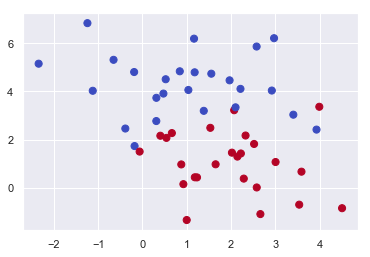
<center><b>Figure 4. Not Perfectly Linearly Separable Data Points</b></center>

In the case shown above, it is impossible to perfectly separate blue points from red points by drawing only straight lines. The way to solve this problem is to change our formulation and introduce a __penalty__. Technically we will penalize any red or blue points which cross the margin lines. We should define how to penalize mistakes because all mistakes may not have the same severity. This approach is called __soft margin__.

The standard approach is to allow a wide decision margin to make a few mistakes (some points &mdash; outliers or noisy examples &mdash; inside or on the wrong side of the margin). To implement this approach we introduce __slack variables__  $\xi_i$, which indicate misclassified examples when they don't meet the margin requirement. In theory, we pay a cost for each misclassified example depending on how far it is from the respective margin line. So, based on our definition, the value of the slack variables is the distance of misclassified data points from the other margin line. The figure below will give you a good understanding of the geometry of the slack variables.


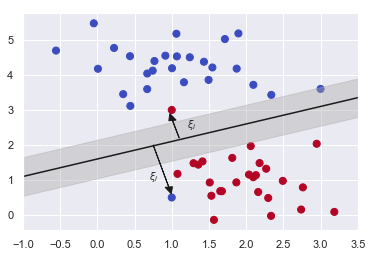
<center><b>Figure 5. Geometry Intuition of Penalty for misclassified Data Points</b></center>

For example, as you see in the figure above, the values for the misclassified blue point is slack $\xi^{(i)}$ and for the misclassified red point is slack $\xi^{(j)}$. The optimization problem is then trading off how fat it can make the margin versus how many points have to be moved around to allow this margin. The objective of our optimization is to find $w$ and $b$ which make the penalty as small as possible, as well as maximizing the margin. Whenever our example correctly classified slack the value is equal to zero and if the data point is on the wrong side of the margin it takes a penalty slack value of $\xi$. 

Also, we add parameter $C$ to our formulation to gain some control for tuning the algorithm. The parameter $C$ is a regularization term, which provides a way to control overfitting. If $C$ is really large, our problem is closer to the hard margin problem. If we have a really small $C$, slack variables won't be important anymore and the hyperplane cannot do the right job for separating data points. So we will need to adjust $C$ to have the right fit.

We rewrite our equation to minimize margin as $\frac{1}{2}w^T \cdot w +C\sum_{i=1}^m \xi^{(i)} $. So, in this equation, we say we want to find a optimum $w$ which has the largest margin, and at the same time it minimizes the number of misclassifications. The formulation of the SVM optimization problem with slack variables is:


$$ \text{Soft-margin:} \begin{cases} 
      \text{minimize} & \frac{1}{2}w^T \cdot w +C\sum_{i=1}^m \xi^{(i)} \\
      \text{subject to} & y^{(i)}(w^T \cdot x^{(i)}+b)\geq 1 - \xi^{(i)} \text{, for every $i$ training example } 
   \end{cases}
$$



### Binary Classification using scikit-learn

Now that we know how SVMs work, we will go through how to use scikit-learn to perform SVM classification. In the first step we add the necessary packages and generate some sample data to classify using the `make_blobs` function. You can set the number of samples and the cluster standard deviation using `n_samples` and `cluster_std`.

In [0]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import sklearn
theme = 'seismic'
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=1.3)

In the next step we will train the algorithm using the `SVC` class. We set the $C$ value to 100 but you can try different values to see the effect. Also, we add the `plot_svc_decision_boundary` function to plot the median and margin lines. 

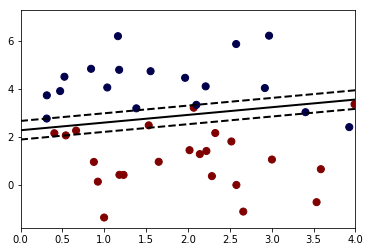

In [0]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


# Plotting the samples
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=theme);

# Classifying By using SVM
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(X, y)

# Restricting the X axis for plotting 
plt.xlim(0,4)

# Drawing the decision boundaries 
plot_svc_decision_boundary(svm_clf, 0, 4)
plt.show()

**Exercise**

Here we retrieve the Iris dataset and filter setosa and versicolor. Try to classify setosa and versicolor based on petal width and petal length. Also, use `plot_svc_decision_boundary` to plot the decision boundaries.

__HINT:__ Setosa and versicolor based on petal width and petal length are perfectly linearly separable.

In [0]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as  plt
import numpy as np
data = load_iris()
X, y = data.data[:,(2,3)], data.target

data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
# Your work here ...

**Solution**

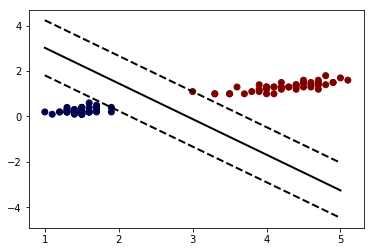

In [0]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as  plt
import numpy as np
data = load_iris()
X, y = data.data[:,(2,3)], data.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

plt.scatter(X[:,0],X[:,1],c = y, marker='o', cmap= theme)

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)


plot_svc_decision_boundary(svm_clf,1,5)
plt.show()


# Nonlinear SVM Classification

Linear SVM classifiers are efficient and work surprisingly well in many cases. However, many datasets
are not linearly separable. As we saw in the module on dimensionality reduction, if we transform the data into a higher dimensional space, it may be easier to separate it with a hyperplane. We want to make the dataset as close to linearly separable as we can. 

The figure below shows an example where data points are not linearly separable, initially. However, by using a polynomial transformation, $x^2$, and by transforming the points from $x$ to $(x,x^2)$, linear separation was made possible.

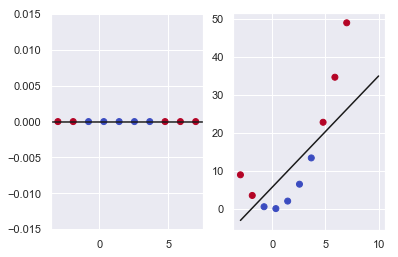
<center><b>Figure 6. Polynomial Transformation on Single Feature</b></center>

## Polynomial Kernel

The __polynomial kernel__ is a kernel function commonly used with SVMs and other kernelized models. They represent the features in a feature space over polynomials of the original variables, allowing for learning of non-linear models. Adding polynomial features is simple to implement and can work great with many classification and regression problems. 

Intuitively, the polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these. In the context of regression analysis, such combinations are known as __interaction features__. 

Polynomial kernels could have some shortcomings though. A low polynomial degree cannot deal with very complex datasets 
and transformation to a very high dimensional space. Not only can they be very slow, they could lead to the curse of dimensionality.

For [degree-$d$ polynomials](https://en.wikipedia.org/wiki/Degree_of_a_polynomial), the polynomial kernel is defined as  $K(x,y) = (x^\mathsf{T} y + c)^{d}$ where $x$ and $y$ are vectors in the input space &mdash; i.e. vectors of features computed from training or test samples and $c ≥ 0$ is a free parameter trading off the influence of higher-order versus lower-order terms in the polynomial. When $c = 0$, the kernel is called homogeneous. For more details you can look into _The Kernel Trick_ section in [Introduction to Machine Learning](https://arxiv.org/abs/0904.3664v1).

In the figure below, you will see an example of the data points which are not linearly separable but by transforming from $(x,y)$ to $(x, y, x^2 + y^2)$ we can easily divide blue points from red points with a simple hyperplane.

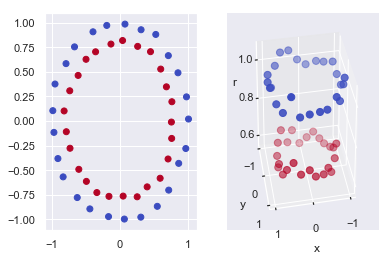
<center><b>Figure 7. Polynomial Transformation on Combinations of Features</b></center>



### Polynomial Kernel using scikit-learn 

In the following example we will generate a moon-shaped dataset, and we will try to fit an SVM classifier with a polynomial kernel. In the first step, we generate the data and import the necessary libraries.

In [0]:
from sklearn.datasets.samples_generator import make_moons
from matplotlib import pyplot as plt
import numpy as np

X, y = make_moons(n_samples=100, noise=0.2)

Also, for visualizing the decision boundaries we can add the following function:

In [0]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap='seismic', alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap='seismic', alpha=0.1)

The following SVM using a polynomial kernel is trained on the data and then we plot it. As you can see, when you define a polynomial kernel you can set the `degree` and `coef0` as hyperparameters. `degree` represents $d$ and `coef0` represents $c$ in $K(x,y) = (x^\mathsf{T} y + c)^{d}$. Try different values for these two hyperparameters as well as `C` to test which ones result in a better fit.

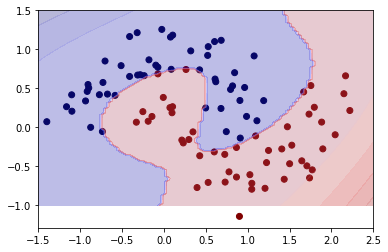

In [0]:
plt.scatter(X[:,0], X[:,1], c= y, cmap='seismic')

svm_clf = SVC(kernel="poly", degree=9, coef0=7, C=1000)
svm_clf.fit(X, y)
plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])


## Gaussian Kernel

Another approach to non-linear SVM problems is to add features by computing the similarity of features to particular __landmark(s)__. One of the similarity functions we can use is the [__Gaussian Kernel__](https://en.wikipedia.org/wiki/Radial_basis_function_kernel). The Gaussian Kernel is a popular kernel function used in various kernelized learning algorithms and particularly in support vector machine classification.

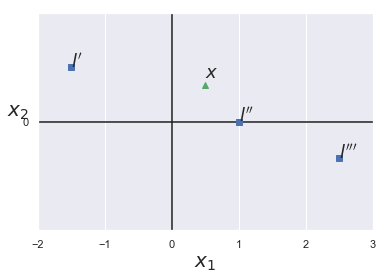
<center><b>Figure 8. Landmarks in $R^2$ Space</b></center>

As seen above, we picked three points as our landmarks and we calculate our new features as follows:


$$ f' = similarity(x,l') = e^{-\gamma ||x-l'||^2}$$


$$ f'' = similarity(x,l'') = e^{-\gamma ||x-l''||^2}$$


$$ f''' = similarity(x,l''') = e^{-\gamma ||x-l'''||^2}$$



In the figure below, we can see that we have moon-shaped data points. We'd like to transform all these points to $R^3$ space by features we made already. 

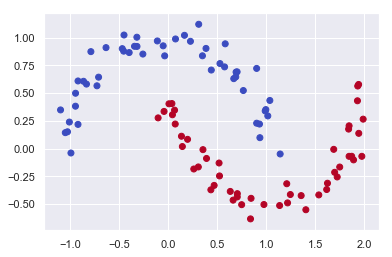
<center><b>Figure 9. Moon Shape Data Points</b></center>

Above, you can see how the data points are transformed by using our new features (distance to landmarks). As seen below, it is easier to separate the blue points from red points by using a hyperplane after building the new features.

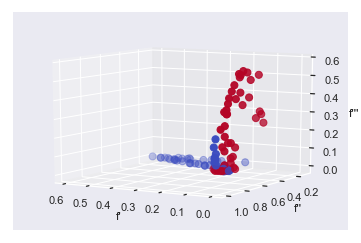
<center><b>Figure 10. Transformed Moon Shape Data Points with New Features</b></center>

So the question remains: How do we select these landmarks? One way to achieve this is to place landmarks on the locations of our data points. In this way, we make many dimensions which make it more probable for data points to be linearly separable. If we have $m$ features and $n$ data points, we will end up with $n$ features if the original features are not included. 

__NOTE:__ If $n$ is very large you might fall into to the curse of dimensionality!

### Gaussian Kernel using scikit-learn

In this example we will again generate a moon-shaped dataset, and the goal is to train the SVM model using a Gaussian Kernel. In the first step, we import the necessary libraries and generate the data. Also, we add `plot_predictions` for finding the decision boundaries.

In [0]:
from sklearn.datasets.samples_generator import make_moons
from matplotlib import pyplot as plt
import numpy as np
theme = 'seismic'

X, y = make_moons(n_samples=100, noise=0.2)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=theme, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=theme, alpha=0.1)


In this step, we train our model with SVM. To use a Gaussian Kernel, we should set `kernel="rbf"`. Also, we have two other hyperparameters we can set: `gamma` and `C`. Try different combinations of these parameters to see how the SVM performs.

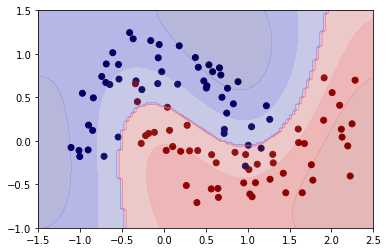

In [0]:
plt.scatter(X[:,0], X[:,1], c= y, cmap=theme)

svm_clf = SVC(kernel="rbf", gamma=0.5, C=20)
svm_clf.fit(X, y)
plot_predictions(svm_clf,[-1.5, 2.5, -1, 1.5])

As you see in the example above, our model has a good fit. However if you do not set `gamma` properly you will end up with a model either underfit or overfit to the data. In the figure below, you can see the difference for different `gamma` values.

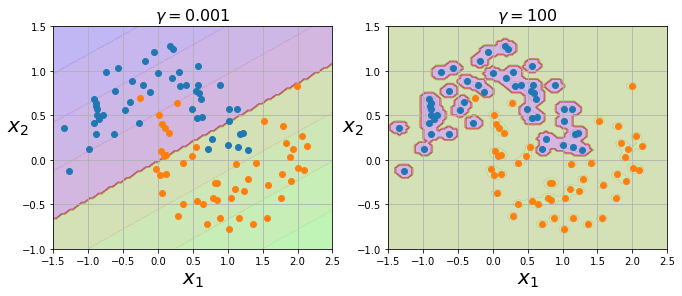
<center><b>Figure 11. Underfitting and Overfitting by using different gammas</b></center>


**Exercise**

Let's load the wine dataset using scikit-learn `dataset`s. Try to build a classifier which classifies different wine types using a kernelized SVM. Try different hyperparameters and compare the results.

In [0]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
dataset = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [0]:
# Your work here ...

**Solution**

In [0]:
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel="poly", degree=2, coef0=7, C=1000)
svm_clf.fit(X_train, y_train)
print("SVM accuracy with polynomial kernel: " + str(accuracy_score(svm_clf.predict(X_test), y_test)))


svm_clf = SVC(kernel="rbf", gamma=0.5, C=20)
svm_clf.fit(X_train, y_train)
print("SVM accuracy with Gaussian kernel: " + str(accuracy_score(svm_clf.predict(X_test), y_test)))



SVM accuracy with polynomial kernel: 0.9666666666666667
SVM accuracy with Gaussian kernel: 0.95


# SVM Regression

The SVM algorithm is quite versatile. Not only does it support linear and non-linear classification, but it also supports linear and non-linear regression. The trick is to reverse the objective. Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations (i.e. instances off the street). The width of the street is controlled by a hyperparameter $ϵ$.

Most other regression techniques try to minimize the error rate whereas SVM regression tries to keep the error within a certain threshold. SVM regression works like this: the loss function ignores any errors within a certain distance of the true value. The error function for all points that are inside epsilon from the line is zero, and only the points outside of  __epsilon__ matter. See the figure below. The loss function ignores errors which are situated within a certain distance of the true value. This type of loss function is usually called an __epsilon intensive loss function__. The variables measure the cost of the errors on the training points. These are zero for all points that are inside the band.

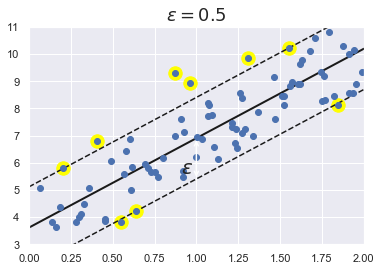
<center><b>Figure 12. Geometry Intuition of Epsilon in SVM Regression</b></center>

Like any other hyperparameter, you should choose epsilon carefully since it might affect the performance of your model. The figure below shows how the choice of epsilon can lead to under or overfitting.

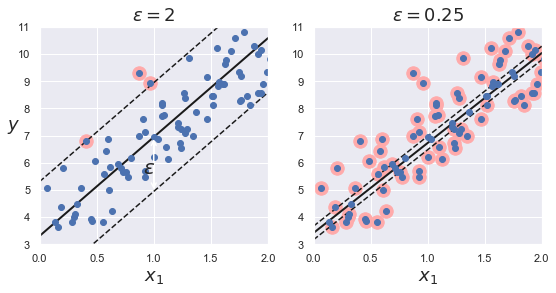
<center><b>Figure 13. Underfitting and Overfitting by choosing different $ϵ$</b></center>


## Linear SVM Regression using scikit-learn

In this example we are going to build a regression model by using scikit-learn on our generated sample data. In the first step, we import necessary libraries and generate the sample data. Also, we add `plot_svm_regression` for performing regression tasks.

In [0]:
from matplotlib import pyplot as  plt
import numpy as np
np.random.seed(50)
m = 100
X = 3 * np.random.rand(m, 1)
y = (5 + 2 * X + np.random.randn(m, 1)).ravel()

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.plot(X, y, "bo")
    plt.axis(axes)

Here is the code for building the linear SVM regression model using scikit-learn. You should set the `epsilon` hyperparameter when you are building the regression model. 

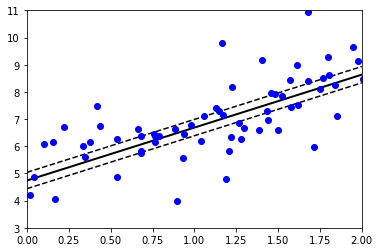

In [0]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 0.3)
svm_reg.fit(X, y)

plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11]);
plt.show()


**Exercise**

Here we load the data related to house prices in Boston. Try to build a SVM regression model to estimate the prices. Also, try different values for `epsilon` to see which one gives the better fit.

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR

boston_house_prices_data = load_boston()
X = boston_house_prices_data.data
y = boston_house_prices_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
# Your work here ...

**Solution**

In [0]:
svm_reg = LinearSVR(epsilon = 0.5)
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

25.419934752329624

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you
and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to
your instructor on the designated discussion board.

When you are comfortable with the content, you may proceed to the next module.

# References

Support Vector Machine, nd. Wikipedia, the free encyclopedia, retrieved Jan 20, 2019.  [online](https://en.wikipedia.org/wiki/Support-vector_machine)

Soft Margin Classification, Introduction to Information Retrieval, Cambridge University Press. 2008. [online](https://nlp.stanford.edu/IR-book/html/htmledition/soft-margin-classification-1.html)

Nonlinear SVMs, Introduction to Information Retrieval, Cambridge University Press. 2008. [online](https://nlp.stanford.edu/IR-book/html/htmledition/nonlinear-svms-1.html)

Nonlinear Optimization and Support Vector Machines. Veronica Piccialli, Marco Sciandrone. [pdf](http://people.uniroma2.it/veronica.piccialli/survey_piccialli_sciandrone_final.pdf)

Polynomial Kernel, nd. Wikipedia, the free encyclopedia, retrieved Jan 20, 2019. [online](https://en.wikipedia.org/wiki/Polynomial_kernel)

Support Vector Machine Regression. [online](http://kernelsvm.tripod.com/)

Support Vector Regression Or Svr. Indresh Bhattacharyya. [online](https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff)

Understanding Support Vector Machine Regression, Mathworks, retrieved Feb 4, 2019 [onine](https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html)

Radial Basis Function Kernel, nd. Wikipedia, the free encyclopedia, retrieved Jan 20, 2019. [online](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)

Kernel Method, nd. Wikipedia, the free encyclopedia, retrieved Jan 20, 2019. [online](https://en.wikipedia.org/wiki/Kernel_method)

Support Vector Machines for Binary Classification, MathWorks. [online](https://www.mathworks.com/help/stats/support-vector-machines-for-binary-classification.html)

Support Vector Machine, YU-FENG CHEN. [online](https://yufengchenblog.wordpress.com/2017/12/06/support-vector-machine/)